In [1]:
import numpy as np
import pandas as pd 

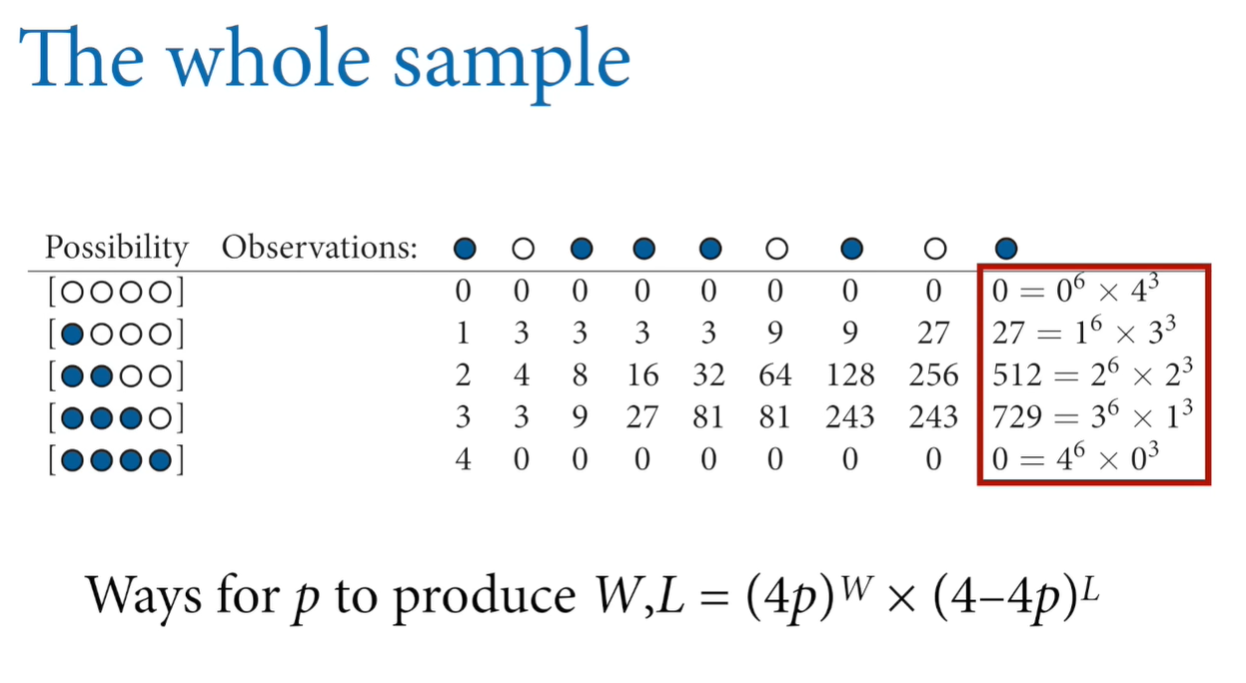

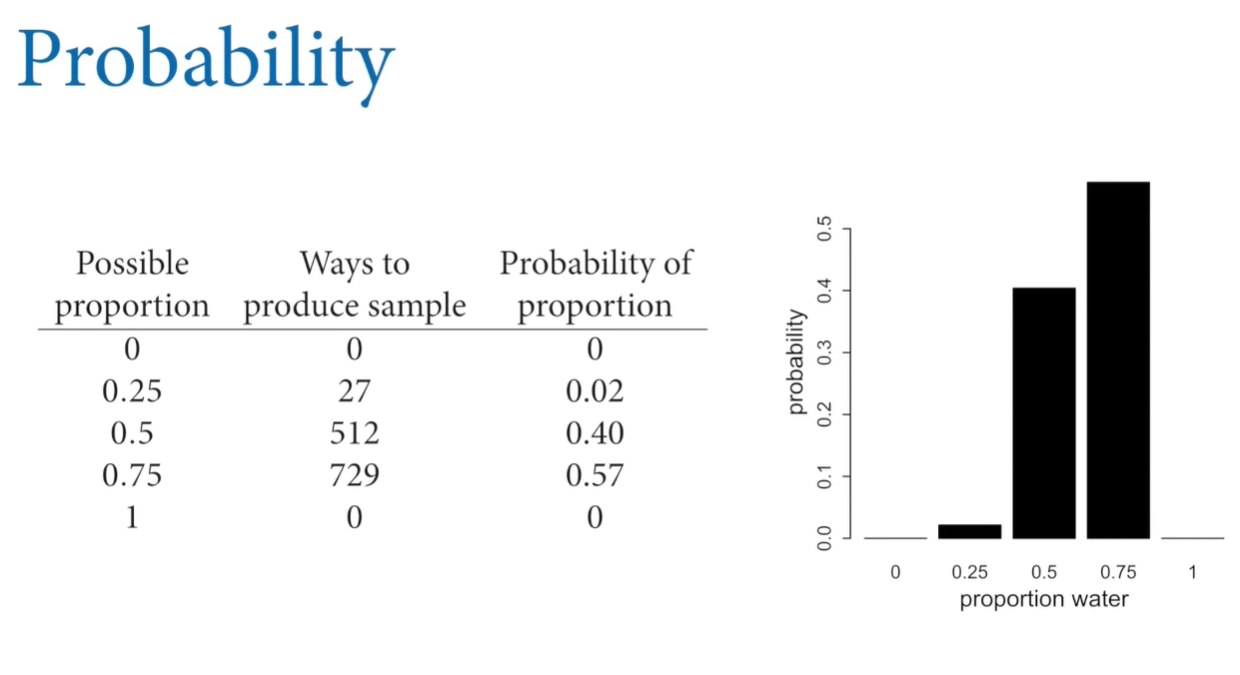

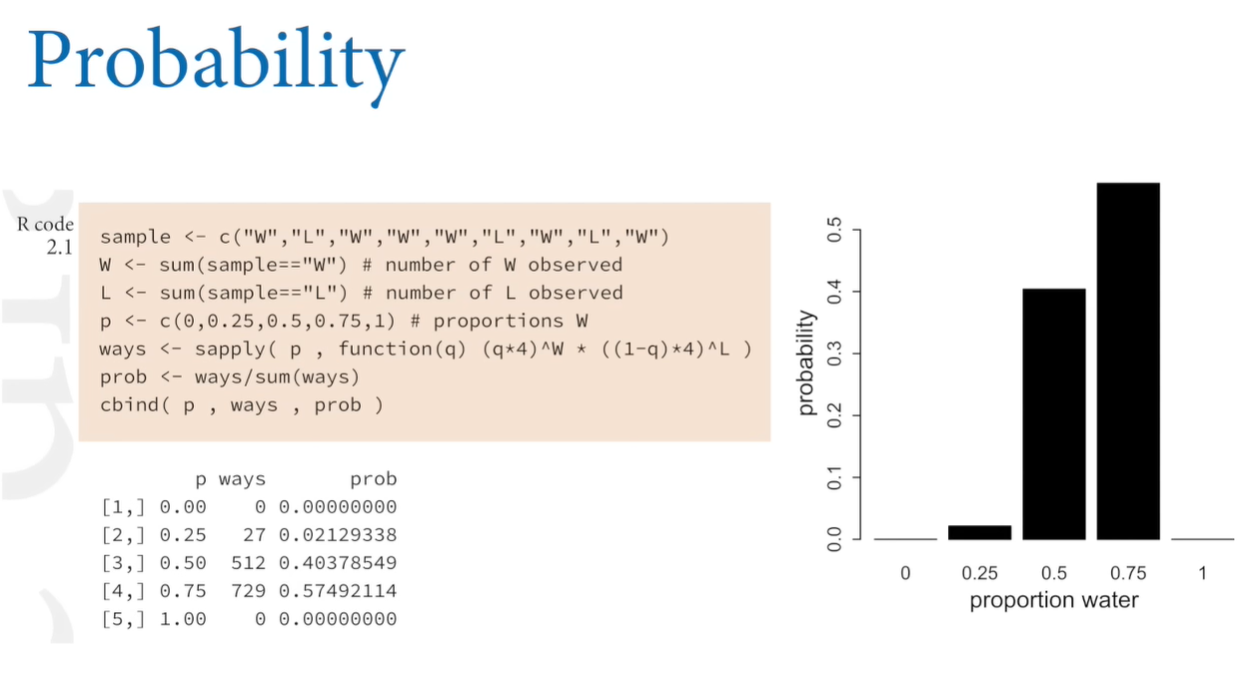

In [26]:
sample = ["W", "L", "W", "W", "W", "L", "W", "L", "W"]

w = sample.count("W")
l = sample.count("L")
proportions = [0, 0.25, 0.5, 0.75, 1]

df = pd.DataFrame()
for i, p in enumerate(proportions):
    # Ways to produce the sample
    ways = (4*p)**w * (4*(1-p))**l
    
    # Possible proportions and ways to produce the sample given the proportions
    row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
    df = pd.concat([df, row])
    
# Posterior Probability
df["post"] = (df["ways"] / df["ways"].sum()).round(2)

# A sample bar plot
df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
df

poss   ways  post    bars
0  0.00    0.0  0.00        
1  0.25   27.0  0.02        
2  0.50  512.0  0.40    ####
3  0.75  729.0  0.57  ######
4  1.00    0.0  0.00

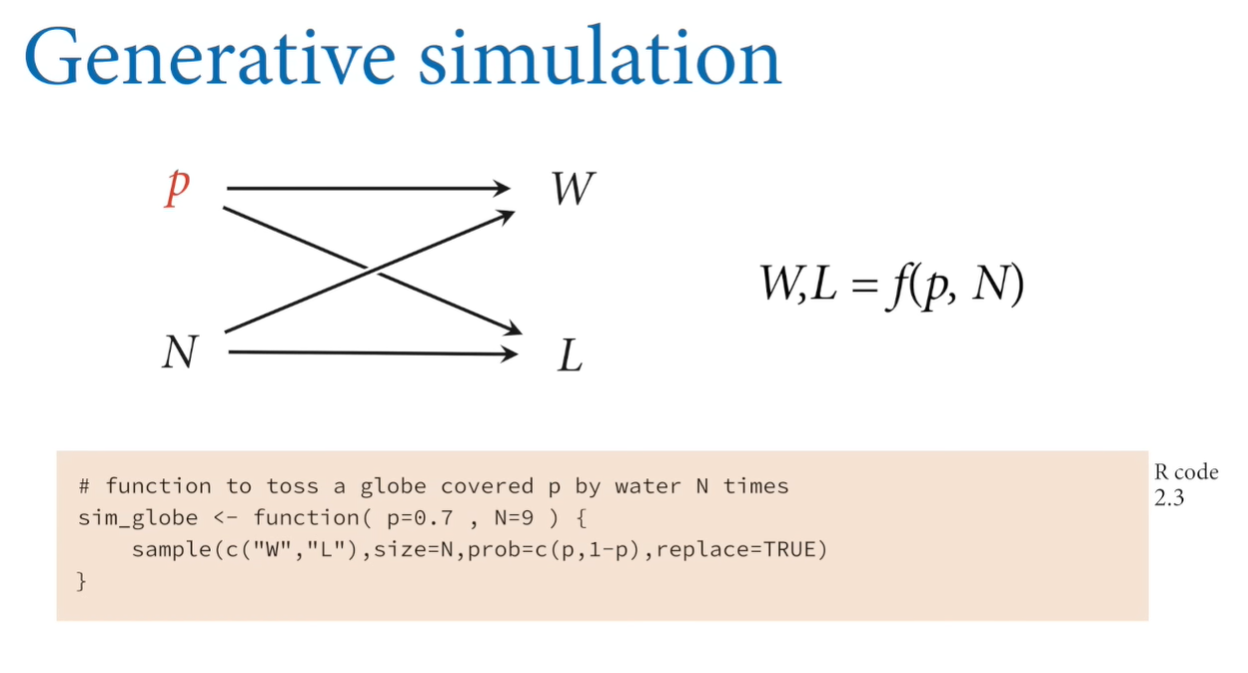

In [215]:
def sim_globe(p=0.7, N=9):
    sample = np.random.choice(["W", "L"], size=N, p=[p, 1-p], replace=True)
    return list(sample)

In [216]:
p = 0.6
N = 10
sample = sim_globe(p, N)
print(sample)
print(f"Proportion: {sample.count('W') / N}")

['L', 'W', 'W', 'W', 'W', 'W', 'L', 'W', 'L', 'W']
Proportion: 0.7


In [35]:
# Replicating for 10 times

for i in range(10):
    sample = sim_globe(p, N)
    print(f"{i}: {sample} | W: {sample.count('W')}, L: {sample.count('L')}")

0: ['W', 'W', 'L', 'W', 'W', 'W', 'L', 'L', 'W', 'L'] | W: 6, L: 4
1: ['W', 'L', 'L', 'L', 'L', 'L', 'W', 'W', 'W', 'W'] | W: 5, L: 5
2: ['W', 'W', 'W', 'W', 'L', 'W', 'L', 'W', 'L', 'W'] | W: 7, L: 3
3: ['L', 'W', 'L', 'L', 'W', 'W', 'W', 'L', 'L', 'W'] | W: 5, L: 5
4: ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 8, L: 2
5: ['W', 'W', 'L', 'W', 'W', 'L', 'W', 'L', 'W', 'W'] | W: 7, L: 3
6: ['L', 'W', 'W', 'W', 'L', 'L', 'W', 'W', 'L', 'W'] | W: 6, L: 4
7: ['W', 'W', 'L', 'L', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 7, L: 3
8: ['L', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'L'] | W: 8, L: 2
9: ['W', 'W', 'L', 'L', 'W', 'L', 'L', 'W', 'W', 'L'] | W: 5, L: 5


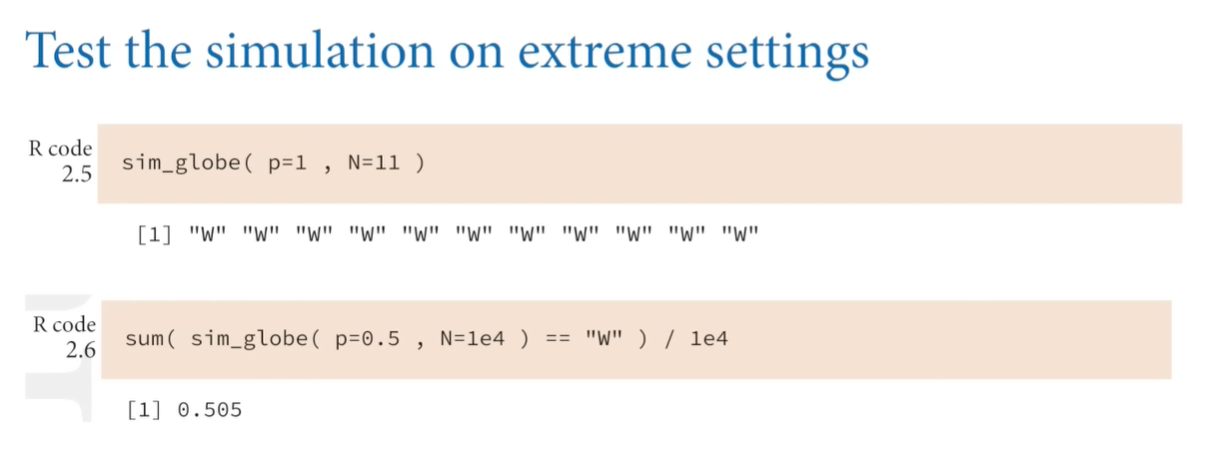

In [42]:
p = 1
N = 11
sample = sim_globe(p, N)
print(sample)

['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W']


In [44]:
# For large samples the proportion of in the sample should be very close to p

p = 0.5
N = int(1e4)
sample = sim_globe(p, N)
print(f"Proportion: {sample.count('W') / N}")

Proportion: 0.5016


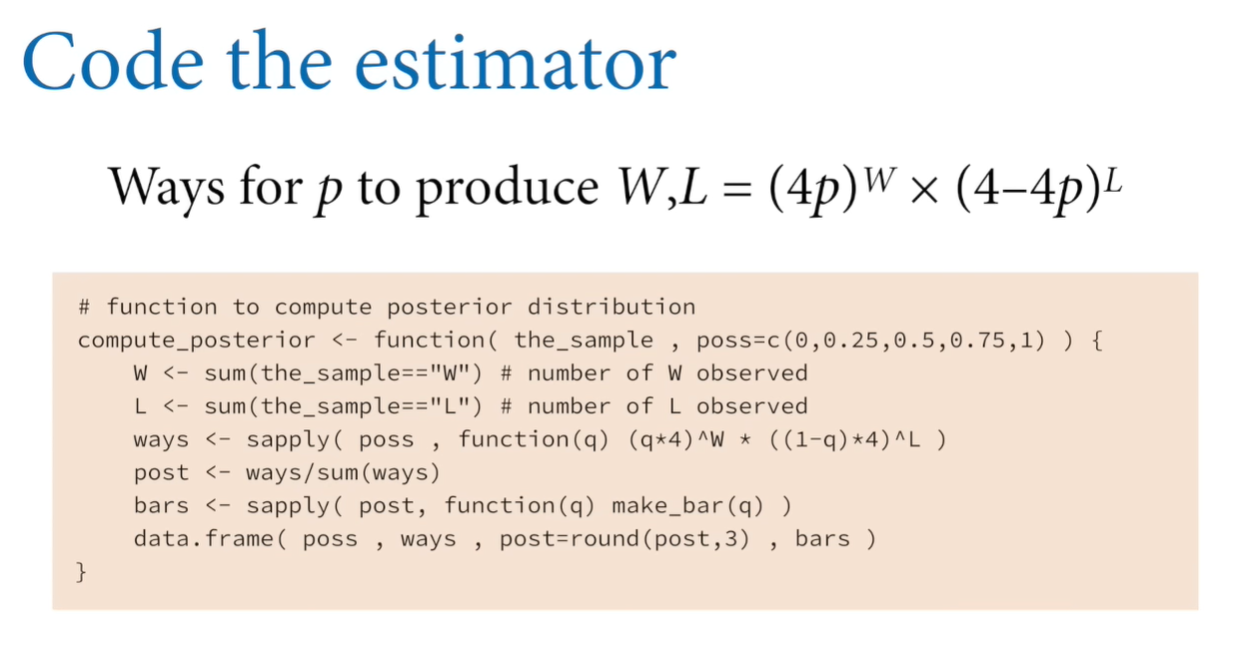

In [47]:
def compute_posterior(the_sample, poss=[0, 0.25, 0.5, 0.75, 1]):
    w = the_sample.count("W")
    l = the_sample.count("L")
    
    df = pd.DataFrame()
    for i, p in enumerate(poss):
        # Ways to produce the sample
        ways = (4*p)**w * (4*(1-p))**l

        # Possible proportions and ways to produce the sample given the proportions
        row = pd.DataFrame({"poss": p, "ways": ways}, index=[i])
        df = pd.concat([df, row])
    
    # Posterior Probability
    df["post"] = (df["ways"] / df["ways"].sum()).round(2)

    # Bar plot
    df["bars"] = df["ways"].apply(lambda n: round((n / df["ways"].sum()) * 10) * "#")
    return df

In [48]:
p = 0.6
N = 10
sample = sim_globe(p, N)

print(f"The Sample: {sample}")
print(f"Proportion: {sample.count('W') / N}")

compute_posterior(the_sample=sample)

The Sample: ['L', 'W', 'L', 'W', 'W', 'L', 'L', 'L', 'W', 'W']
Proportion: 0.5


poss    ways  post     bars
0  0.00     0.0  0.00         
1  0.25   243.0  0.16       ##
2  0.50  1024.0  0.68  #######
3  0.75   243.0  0.16       ##
4  1.00     0.0  0.00

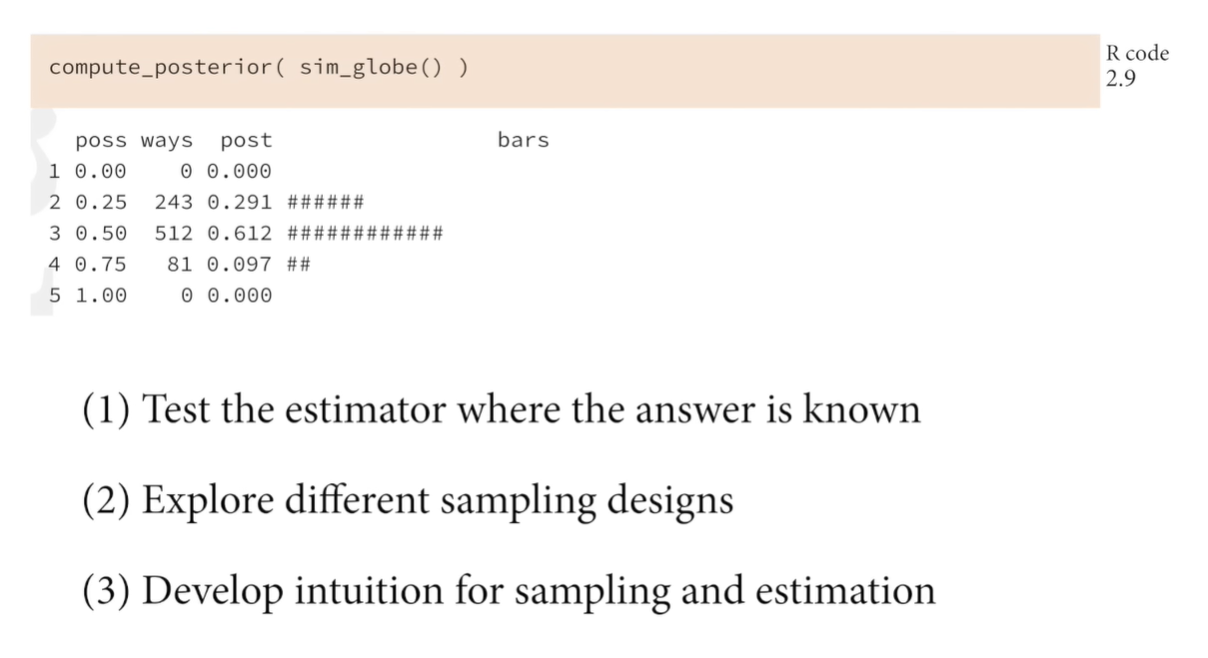


#### When we test the estimator where the answer is known, we can see that as the sample size increases it converges to the right answer and when the sample size is small it correctly characterizes the uncertainty.

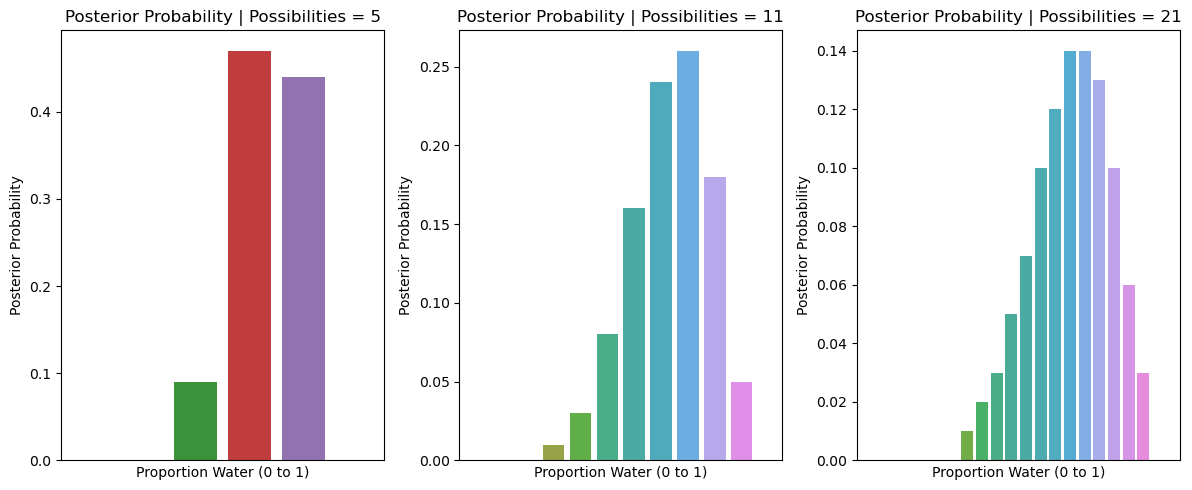

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

p = 0.6
N = 10
sample = sim_globe(p, N)


fig, axs = plt.subplots(1, 3, figsize=(12, 5))

for i, num in enumerate([5, 11, 21]):
    poss = [i * 1/num for i in range(num+1)]
    post_df = compute_posterior(the_sample=sample, poss=poss)
    post_df = post_df.round(2)

    sns.barplot(data=post_df, x="poss", y="post", ax=axs[i])

    axs[i].set_title(f'Posterior Probability | Possibilities = {num}')
    axs[i].set_xticks(ticks=[], labels=[])
    axs[i].set_xlabel('Proportion Water (0 to 1)')
    axs[i].set_xlabel
    axs[i].set_ylabel('Posterior Probability')

plt.tight_layout()
plt.show()

#### When the possibilities increase, the maximum probability decreases. However the sum of probabilities is still 1.

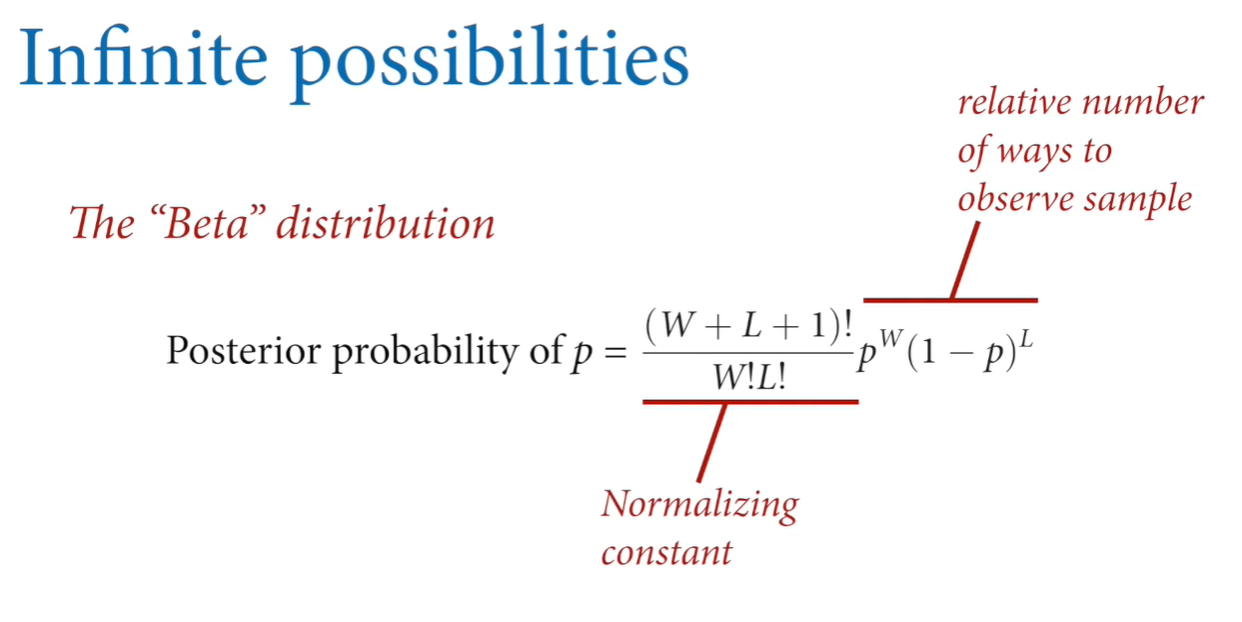

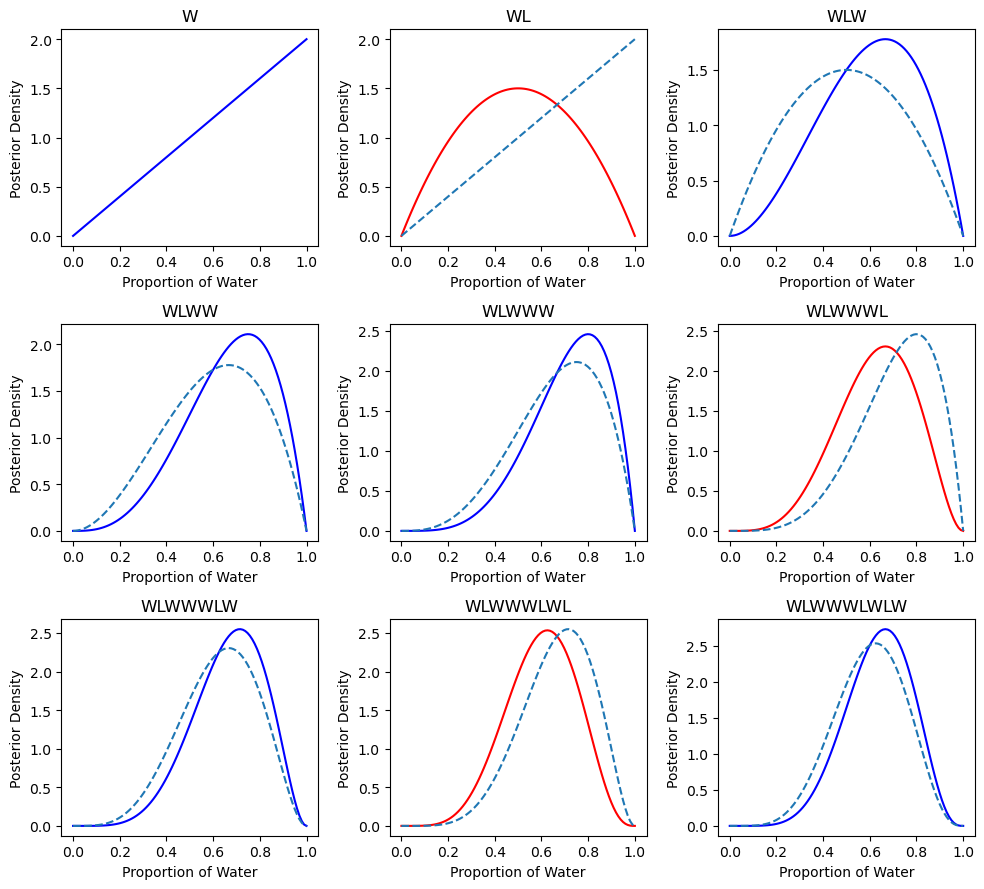

In [127]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import factorial

sample = "WLWWWLWLW"

# Porportion of water
p = np.linspace(0, 1, 100)

fig, axs = plt.subplots(3, 3, figsize=(10, 9))
W, L = 0, 0

prev_post = None
for i, (s, ax) in enumerate(zip(sample, axs.flatten())):
    if s == "W":
        color = "blue"
        W += 1
    else:
        color = "red"
        L += 1

    # Calculate the posterior probability
    posterior = factorial(W + L + 1) / (factorial(W) * factorial(L)) * p**W * (1 - p)**L
    ax.plot(p, posterior, color=color)

    if prev_post is not None:
        ax.plot(p, prev_post, linestyle='--')
    
    ax.set_xlabel("Proportion of Water")
    ax.set_ylabel("Posterior Density")
    ax.set_title(sample[:i+1])
    prev_post = posterior

plt.tight_layout()
plt.show()

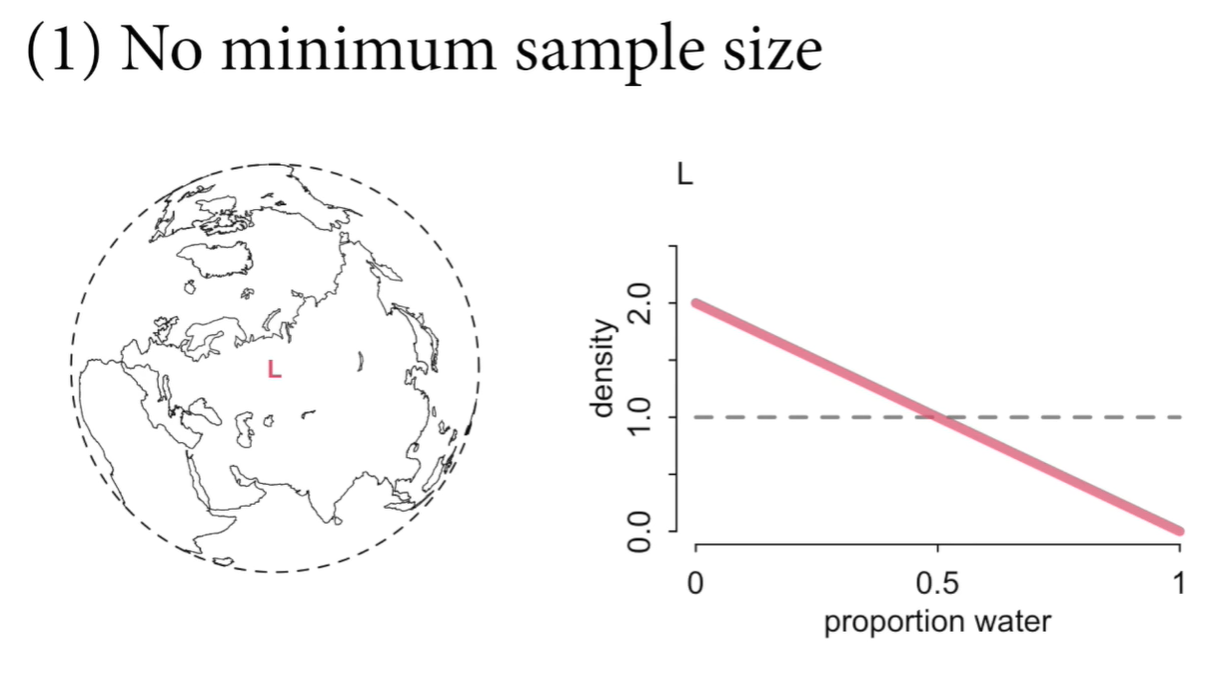

#### The minimum sample size is 1 in bayesian inference. Although this 1 sample is not very informative but it's part of the power of this. It accurately represent the relative confidence we could assign to each of possible proportion of water.

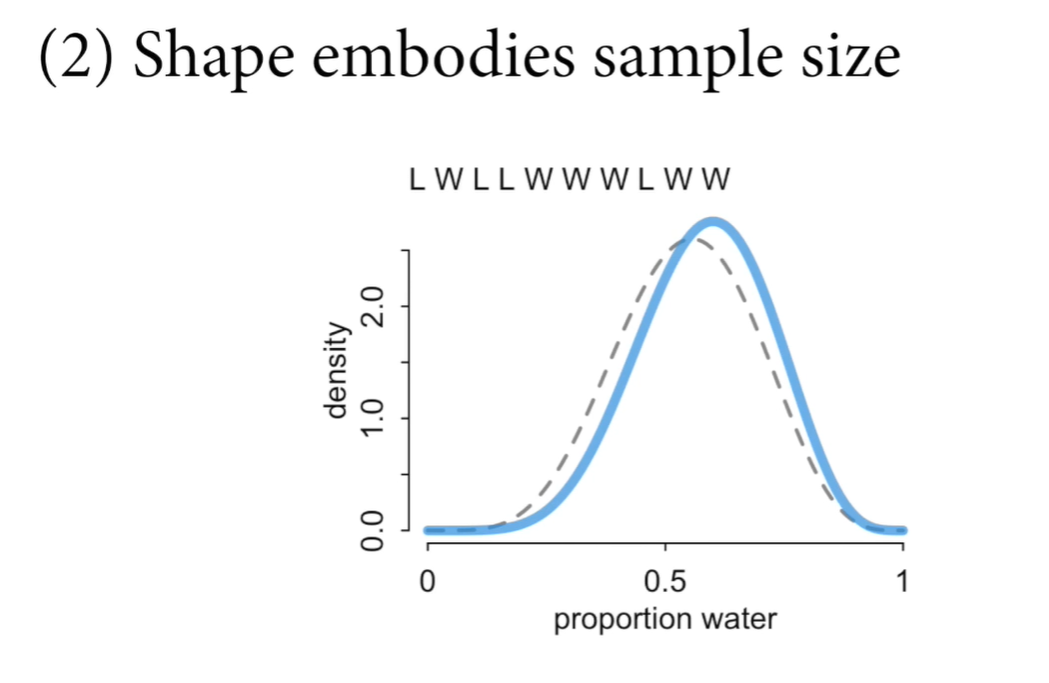

#### As more data (outcomes) are observed, the posterior distribution becomes narrower, indicating increased certainty about the proportion of water.

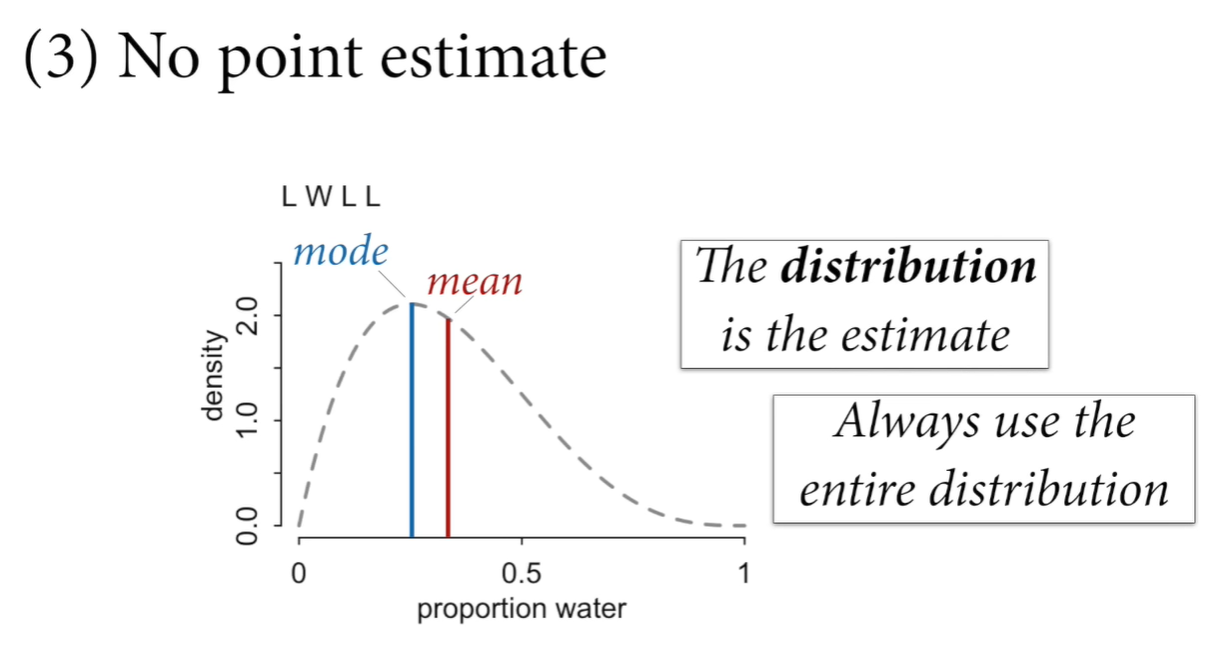


**Mode:** A point where the posterior probability is maximized.

**Mean:** The mean, or average, is calculated by taking each possible proportion of water, multiplying it by its corresponding posterior probability, and then summing all these products together. This process effectively weights each proportion by its likelihood, providing a single summary statistic that represents the expected proportion of water.

> Neither of these points are special and we use the whole distribution for our purposes when we want to compute things from posterior density. Why?
>> Because there is a lot of probability on other points.

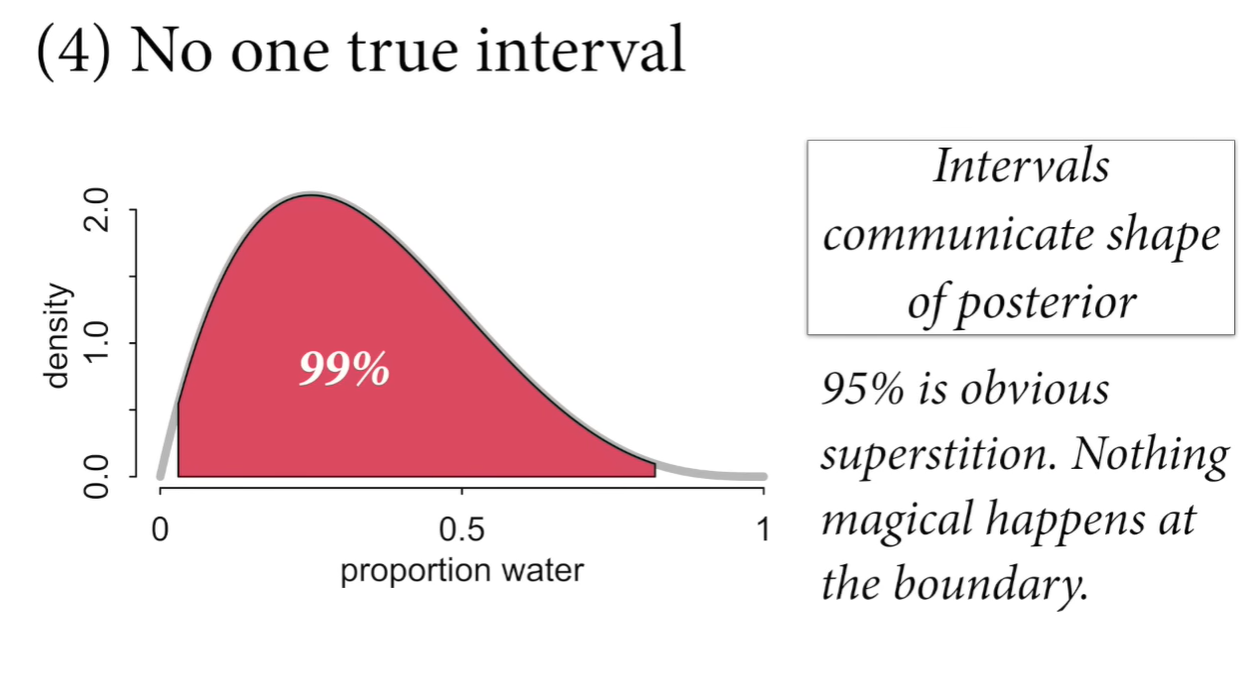
#### Intervals are not important in bayesian inference. They are merely summaries of the shape or distribution when we can not provide the whole distribution. We use them only as a quick summary of the posterior distribution. If the intervals are wide for a particular probabilty mass of the interval then the posterior distribution is spread out and as it gets narrower the posterior distribution becomes more concentrated.

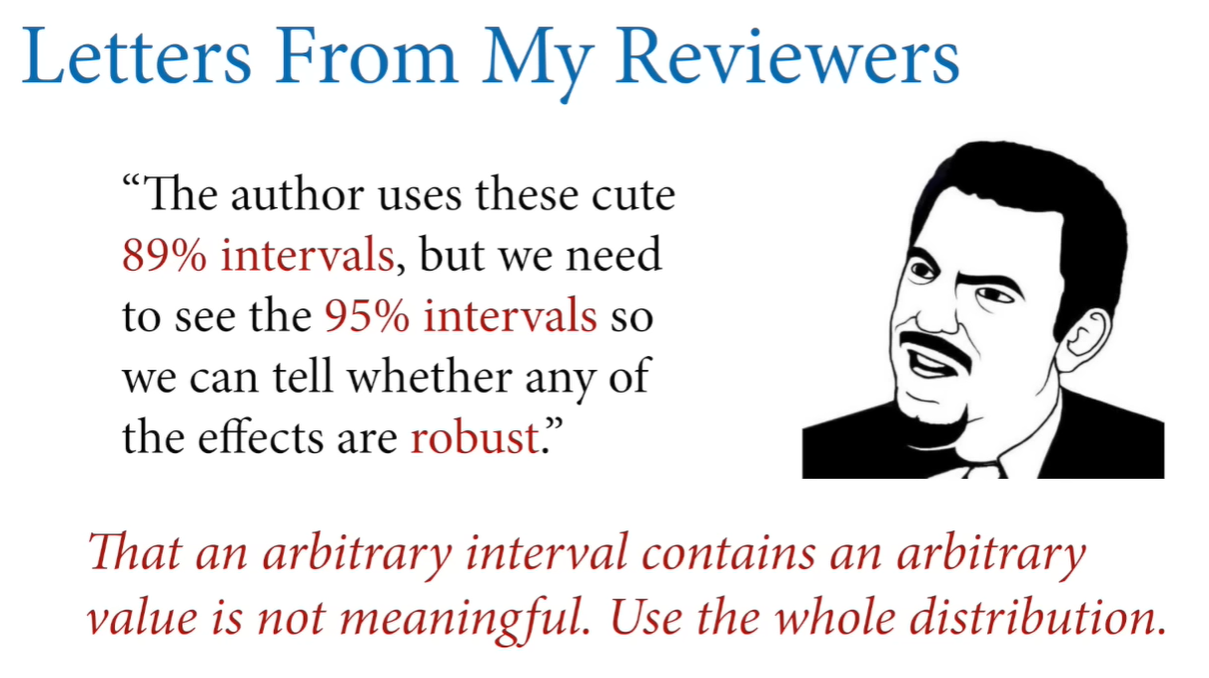

---

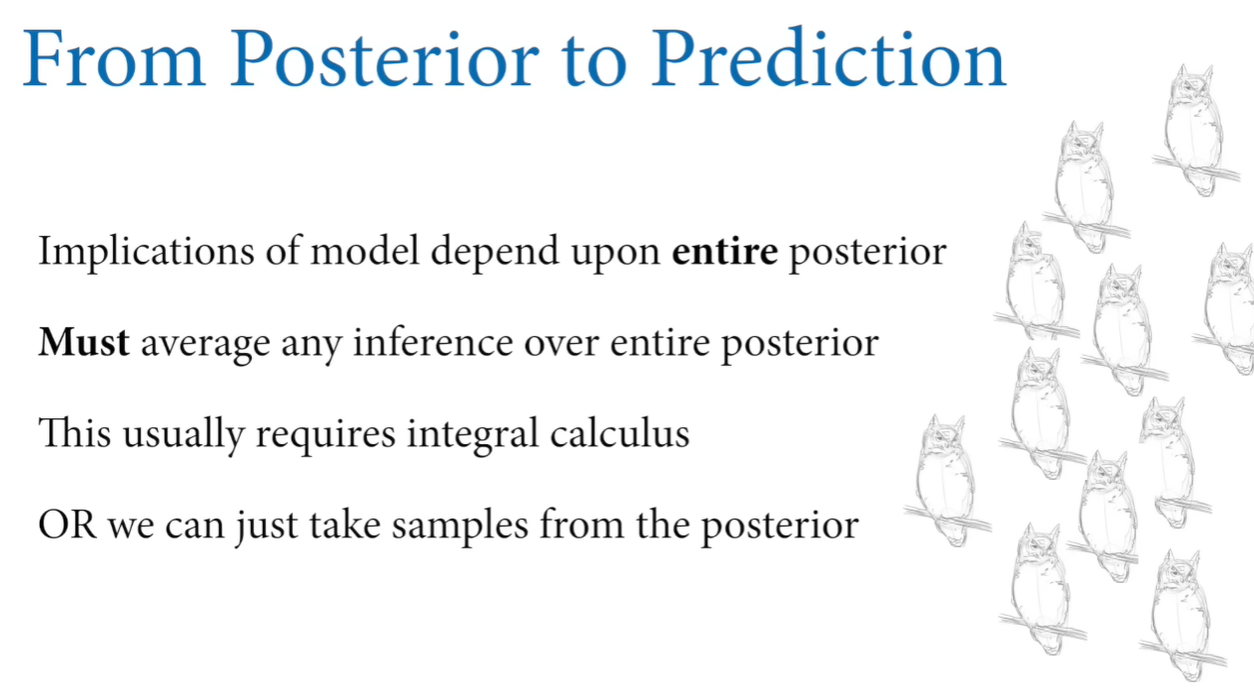

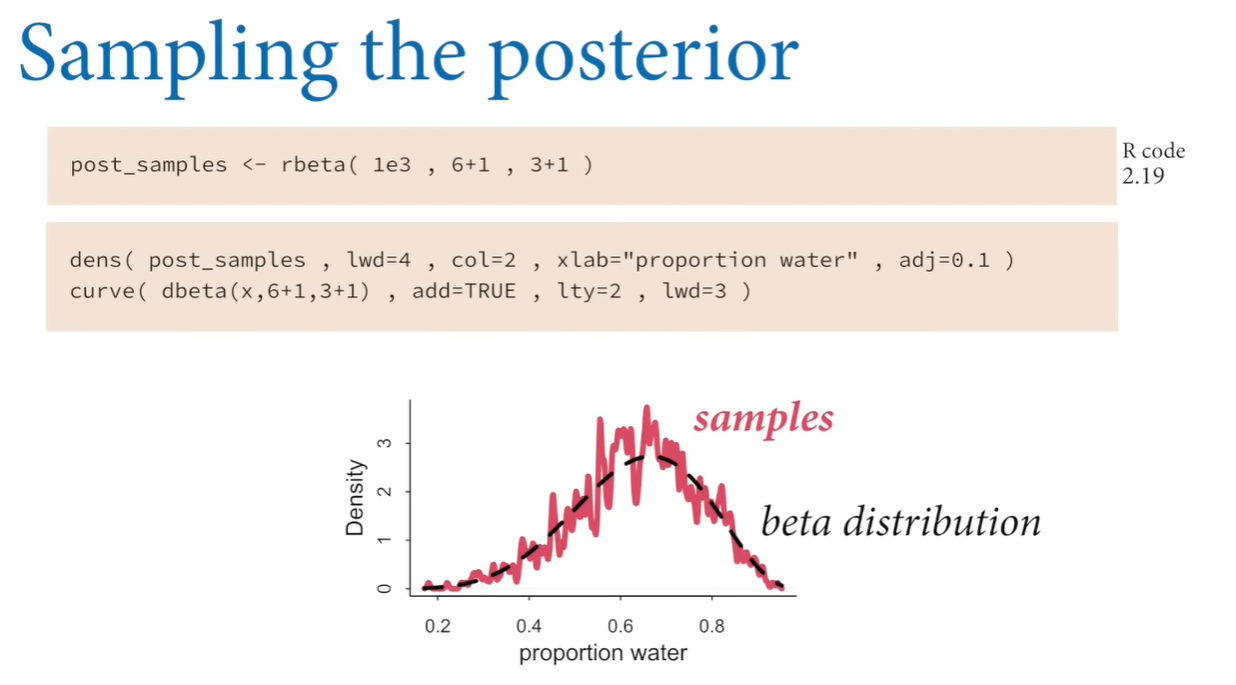

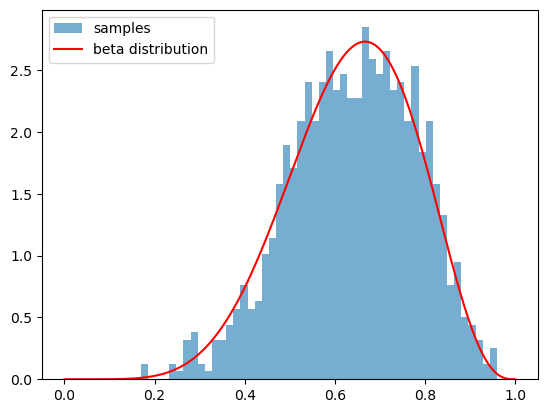

In [202]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

# Number of samples
num_samples = 1000

# Parameters for the beta distribution
alpha = 6
beta = 3

# Generating samples from the beta distribution
sample_p = np.random.beta(alpha+1, beta+1, num_samples)

# Generating a range of p values from 0 to 1
p_values = np.linspace(0, 1, 1000)

# Calculating the whole distribution
whole_dist = factorial(alpha + beta + 1) / (factorial(alpha) * factorial(beta)) * p_values**(alpha) * (1 - p_values)**(beta)

# Plotting a histogram of the samples
plt.hist(sample_p, bins=50, density=True, alpha=0.6, label='samples')

# Plotting the theoretical distribution
plt.plot(p_values, whole_dist, 'r-', label='beta distribution')

plt.legend()
plt.show()

### Posterior Predictive Distribution:
Is a prediction for a future experimental observation made from our existing estimate. So we can say given what we have learned about the globe so far what would happen if we took more samples from it?
> We will probably observe that if we take 10 samples from the distribution, for the most of the time it will hang around 0.6 where the posterior probability is higher.

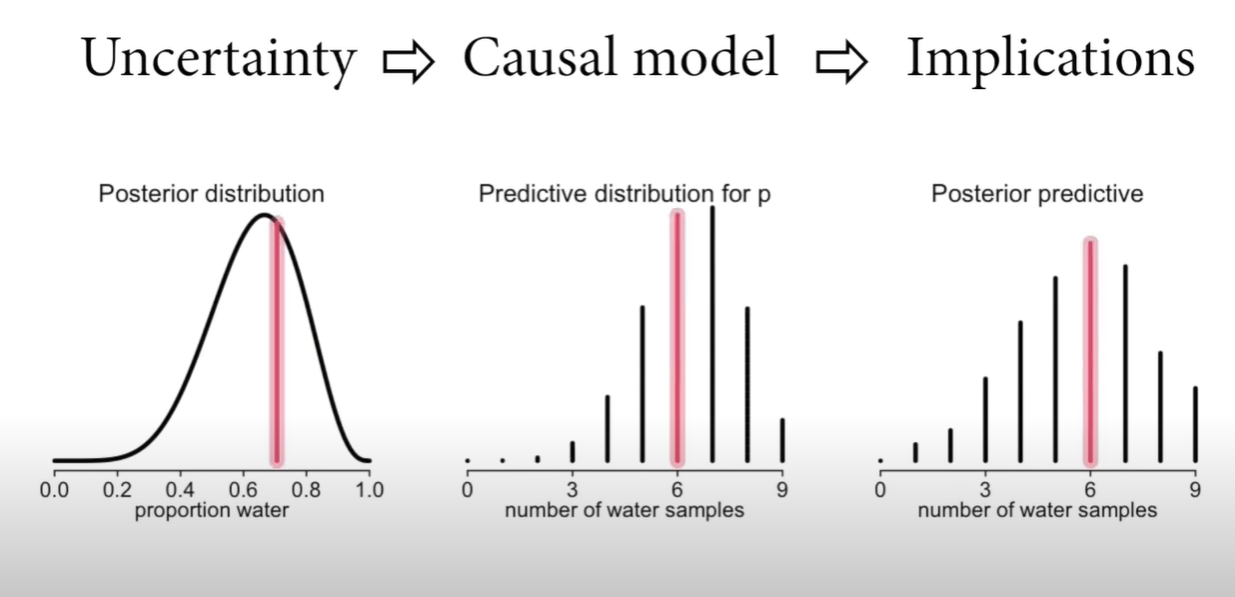

If we take a sample from a region shown in the leftmost plot, its predictive distribution will resemble the middle plot. This means that if we toss the globe 9 times, given that the proportion of water around that chosen point is near 0.7, the predictive distribution indicates a *central tendency of 6 water samples out of 9*.

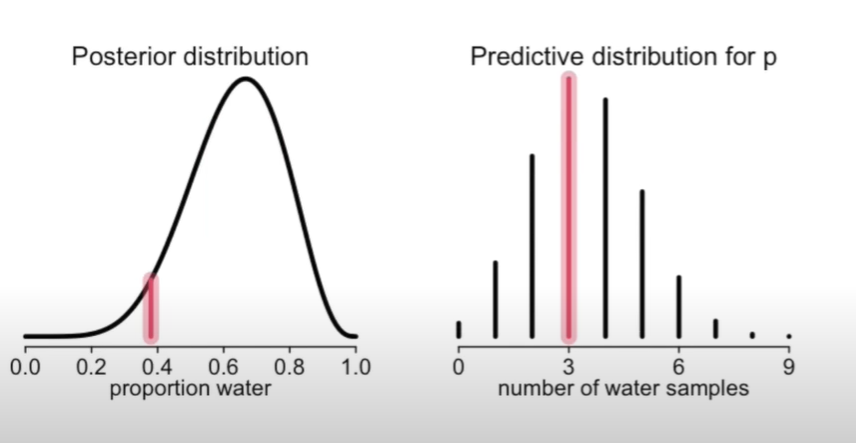

In this example, the proportion of water is about 0.4, and the predictive distribution is skewed towards lower water sample sizes, indicating a *central tendency of 3 water samples out of 9*.

> Why is the posterior predictive distribution flatter and more spread out than the predictive distributions?
>> This is because it contains samples from all the predictive distributions. It accurately characterizes the uncertainty in our estimate about what will happen if we do the experiment again. For each position, it indicates all the times that a certain number of water samples has been observed.

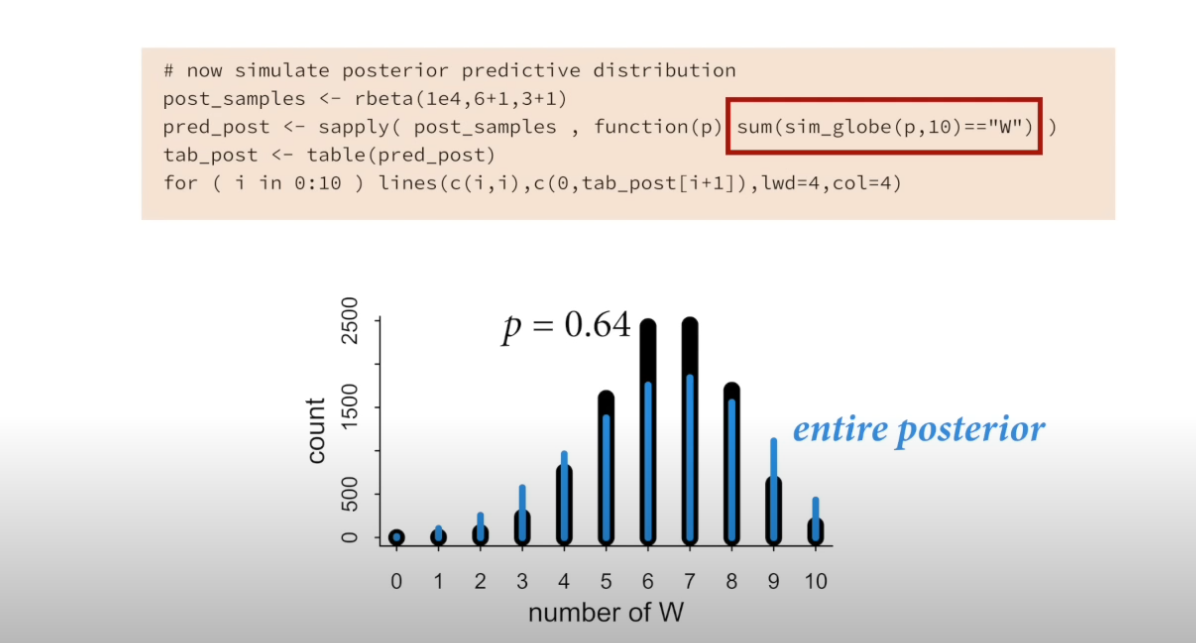

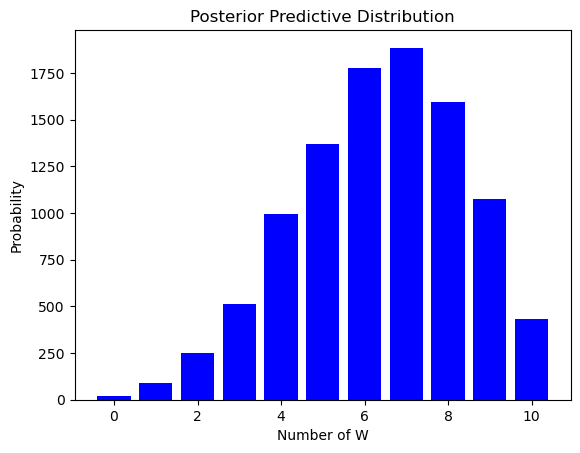

In [209]:
# Samples
alpha = 6
betta = 3
size = 1e4
post_samples = np.random.beta(alpha+1, beta+1, int(size))

# Initializing an array to hold the counts of 'W' in the predictive distributions
counts = np.zeros(11)

for p in post_samples:
    # Generating a predictive distribution using the sim_globe function
    pred_dist = sim_globe(p, 10)

    # Counting the number of 'W' in the predictive distribution
    count_W = pred_dist.count('W')

    # Adding to the corresponding count in the counts array 
    # All the times that water sample count has been observed
    counts[count_W] += 1

# Plot the counts
plt.bar(range(11), counts, color='blue')
plt.xlabel('Number of W')
plt.ylabel('Probability')
plt.title('Posterior Predictive Distribution')
plt.show()

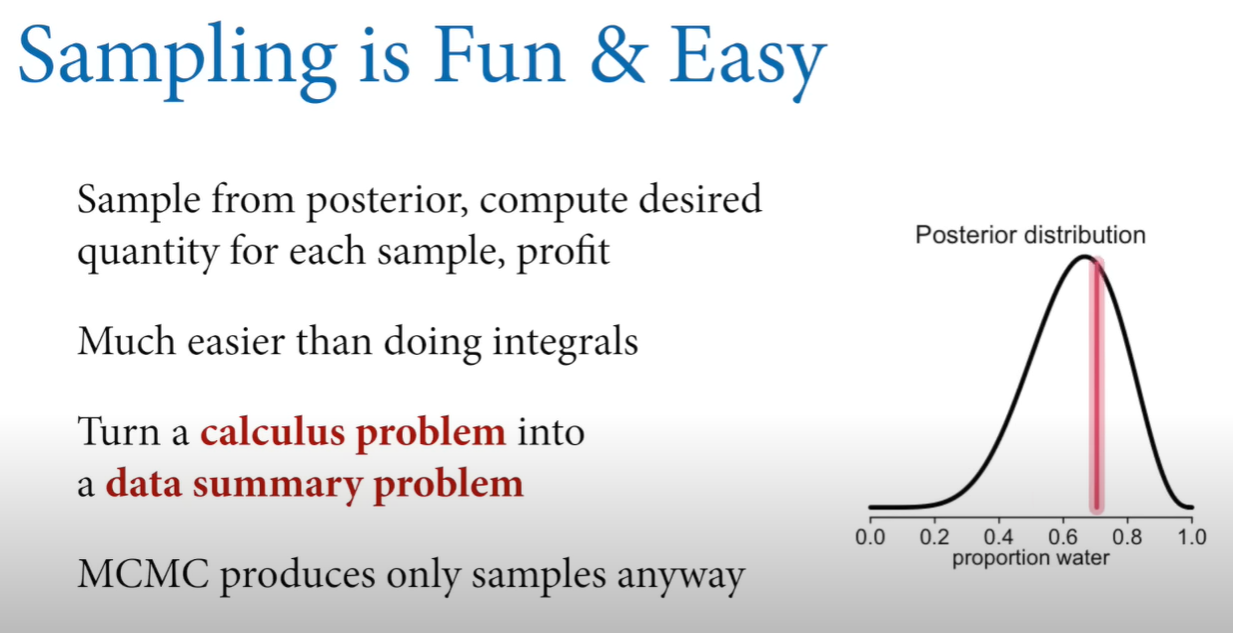

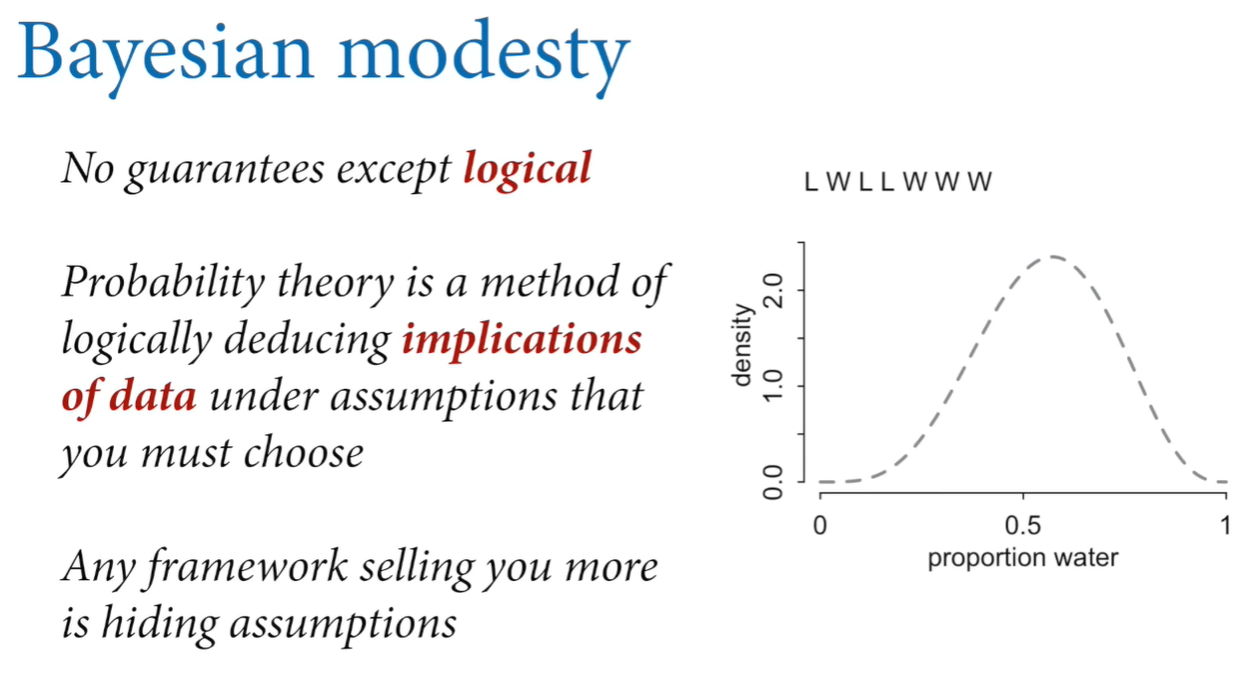


> `The Logic of Bayesian Inference`
>> Bayesian inference gives you no guarantees except that it’s logical. That is, it honestly carries out the assumptions you put into it, and it does the best possible job that it possibly can, taking those assumptions seriously.

> `The Role of Bayesian Inference`
>> And this doesn’t tell us what really happens in the world, but it **helps us tremendously to figure out what happens in the world**, because it lets us work with logical implications of assumptions and then compare those with data and do a **theory development loop** through that action. So this is *a quantitative asset that activates our qualitative knowledge as scientists*.

> `The Subjectivity and Objectivity of Bayesian Inference`
>> It lets the subjective and objective work together. Bayesian inference is completely objective, but the inputs into it, like in all statistical procedures, whether Bayesian or not, are subjective. And that’s good, because subjectivity is expertise.

> `The Power of Bayesian Inference`
>> Now we revise our beliefs when new things happen, and then we change our subjective beliefs, and then we activate the objective procedure again, and we see what the implications are of those changes in our subjective beliefs. And this is a powerful way to do inference. And we say any framework that is giving you more than this is hiding some assumptions that is letting it claim those more things. And so you could always make those assumptions explicit in the Bayesian framework and do the same thing as that other framework.

---

# Misclassification

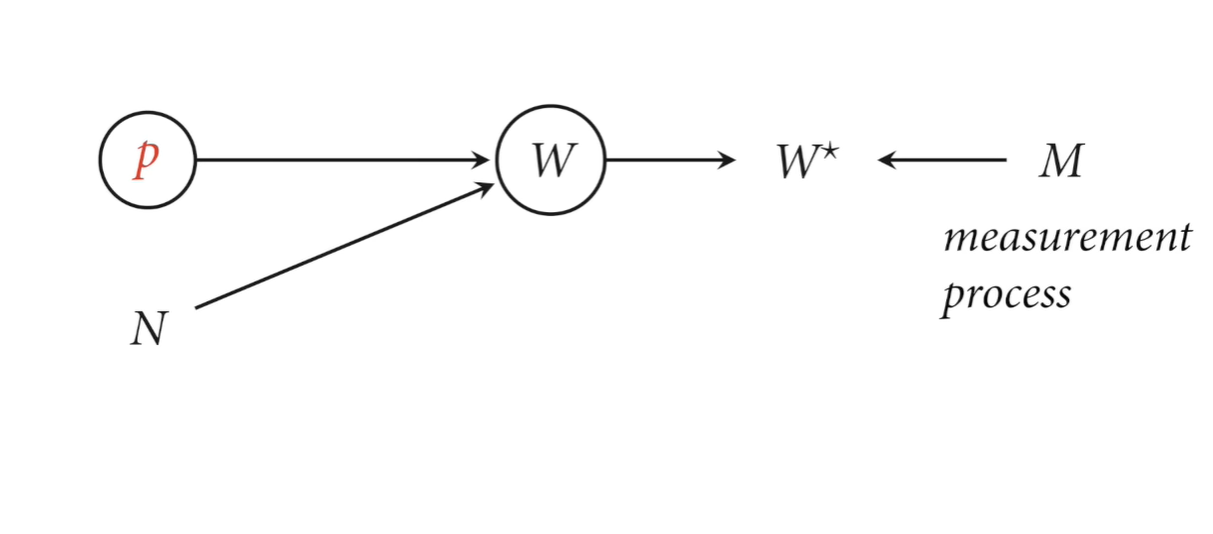

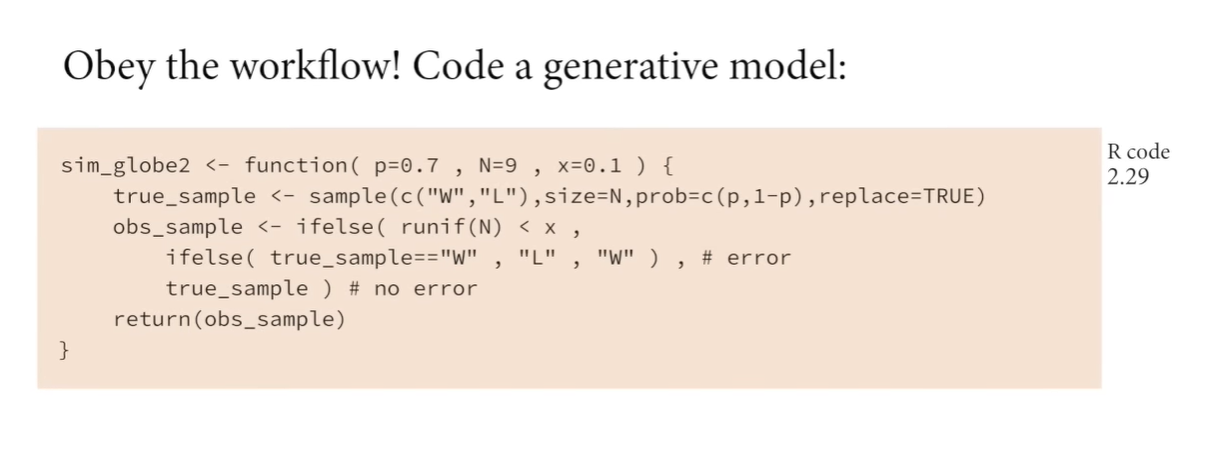

In [212]:
p = 0.7
true_sample = np.random.choice(["W", "L"], size=N, p=[p, 1-p], replace=True)
true_sample

array(['W', 'W', 'L', 'W', 'W', 'W', 'L', 'W', 'L', 'L'], dtype='<U1')

In [230]:
def error(x, obs):
    all = ["W", "L"]
    rnd_x = np.random.rand()
    if rnd_x <= x:
        all.remove(obs)
        return all[0]
    else:
        return obs

def sim_globe_2(p=0.7, N=9, x=0.1):
    true_sample = np.random.choice(a=["W", "L"], size=N, p=[p, 1-p], replace=True)
    obs_sample = [error(x, item) for item in true_sample]
    return list(obs_sample)

In [231]:
p = 0.6
N = 10
sample = sim_globe_2(p, N)
print(sample)
print(f"Proportion: {sample.count('W') / N}")

['L', 'W', 'W', 'L', 'L', 'W', 'L', 'L', 'W', 'W']
Proportion: 0.5


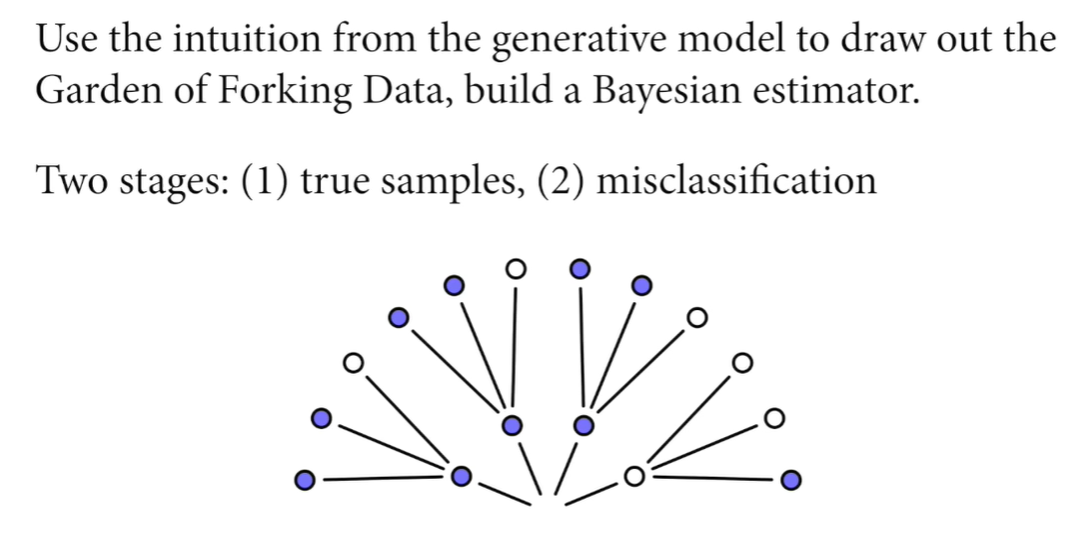

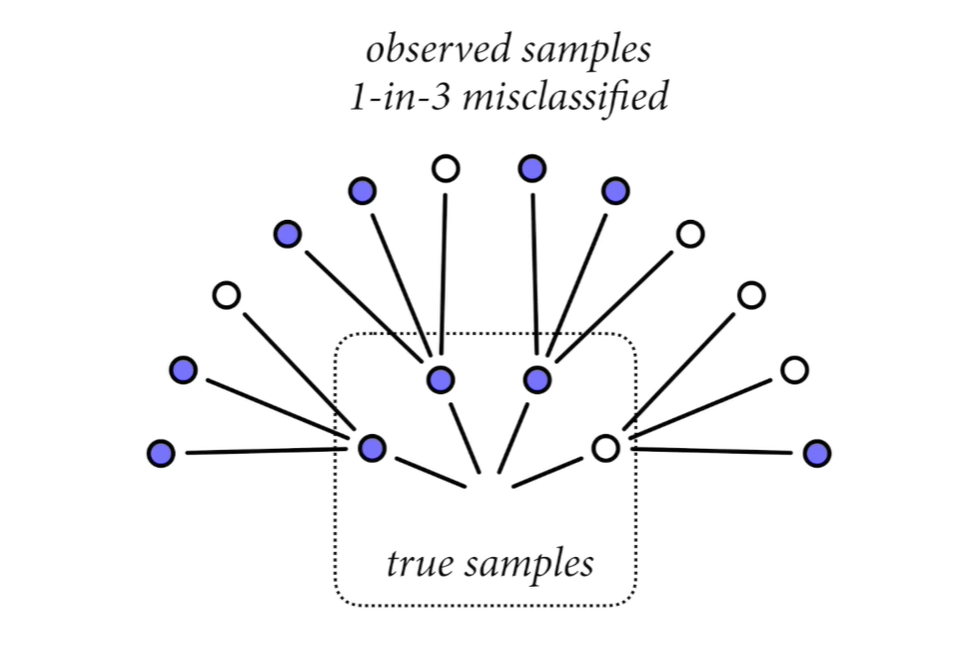

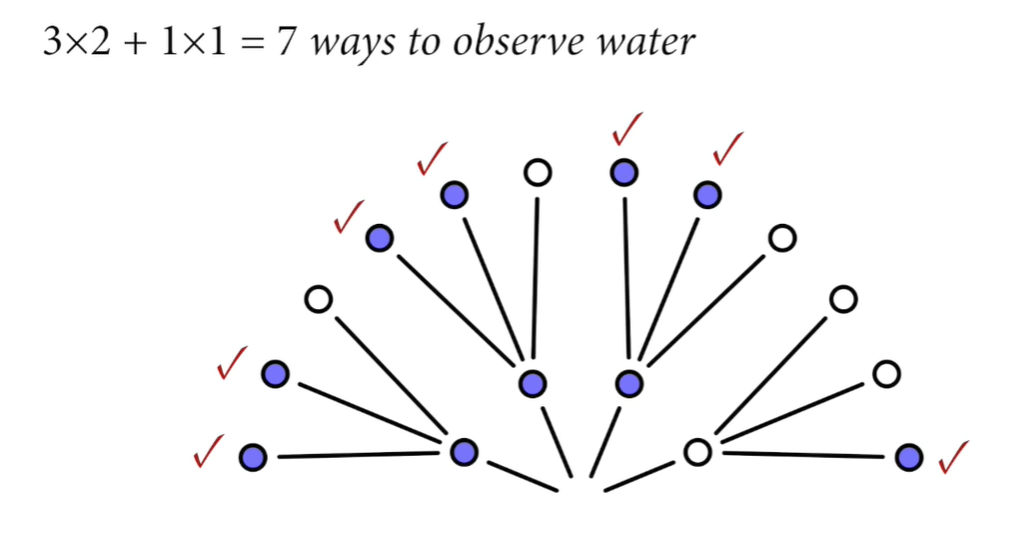

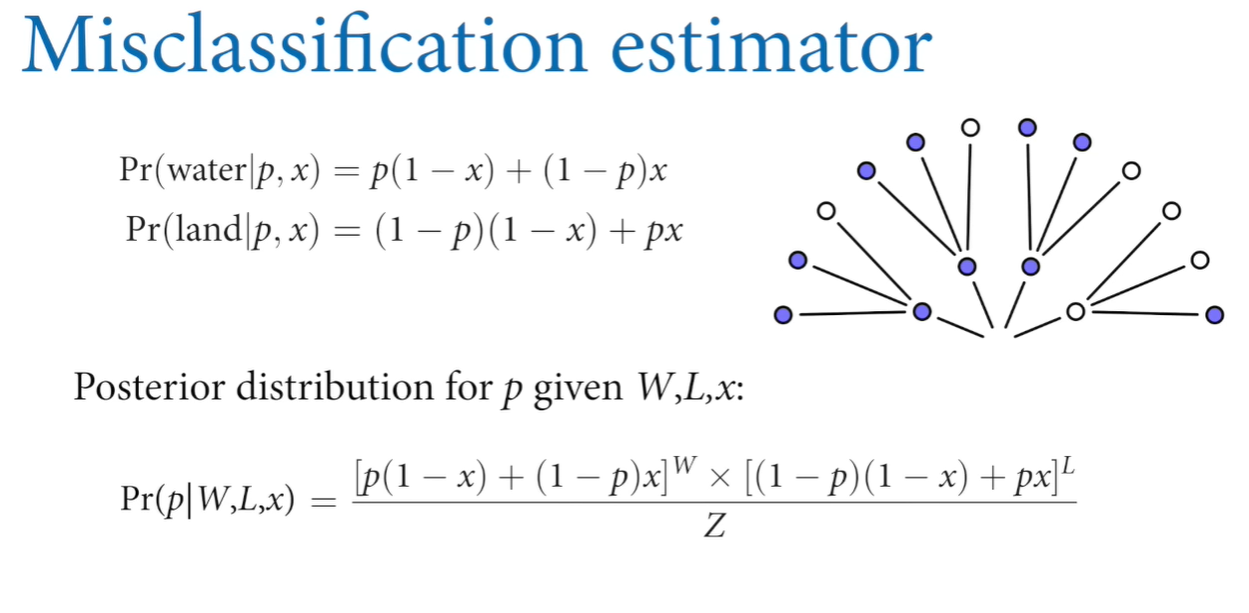

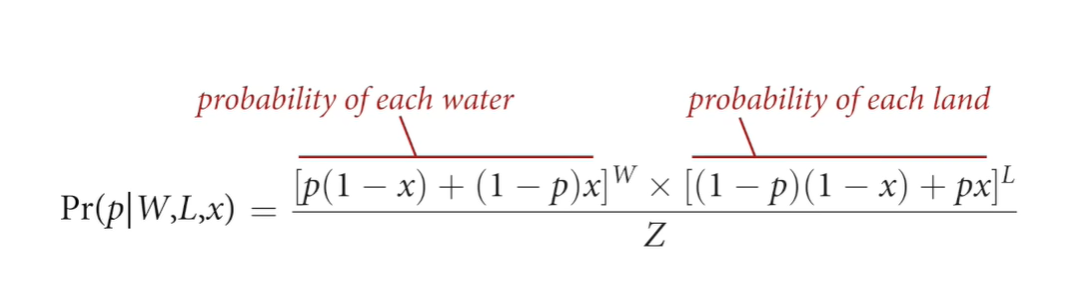

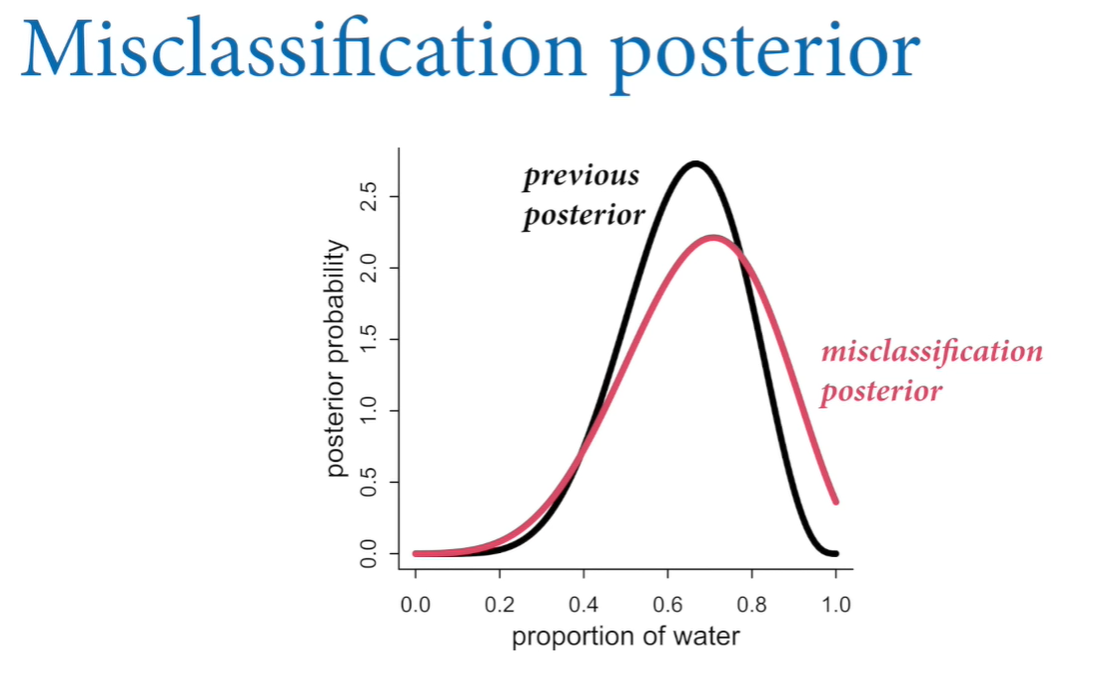